<a href="https://colab.research.google.com/github/rromerov/Machine-Learning-Projects/blob/main/K-Means/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 529 kB/s 
     |████████████████████████████████| 1.0 MB 12.2 MB/s 
     |████████████████████████████████| 1.7 MB 47.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 51.3 MB/s 
     |████████████████████████████████| 6.3 MB 35.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=ab9606920016b461300671da49176b6cb3bad635861dfb20373df42526d7ee62
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=42f844e1e43362d70899b3594be51f6e74243c0d276dd781b1730d45fe1f831f
  Stored in directory: /root/.

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import geopandas

Upload the database

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Let's explore the data

In [4]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


Get the info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


Latitude and longitude are the columns needed to build the K-Means model 

In [6]:
latlong=df[["latitude","longitude"]]

It's time to see the Target stores

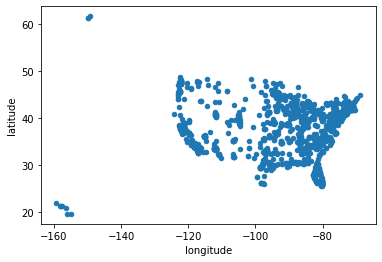

In [7]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Let's use geopandas for a better geographical visualization




In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();
import warnings
warnings.filterwarnings("ignore")

In [10]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [11]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [12]:
#map

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [13]:
#get the names of the countries
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

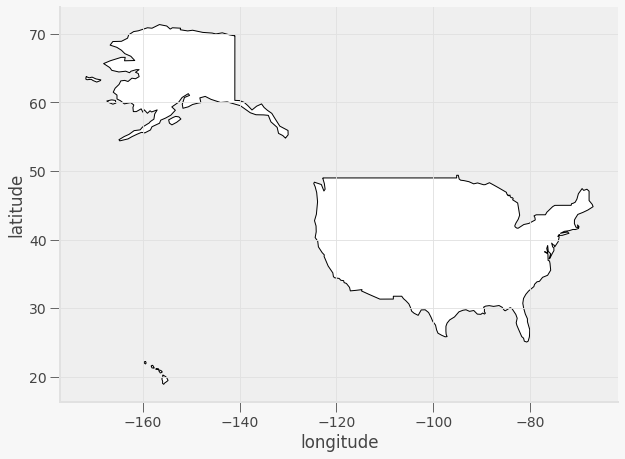

In [14]:
fig, gax = plt.subplots(figsize=(10,10))


world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

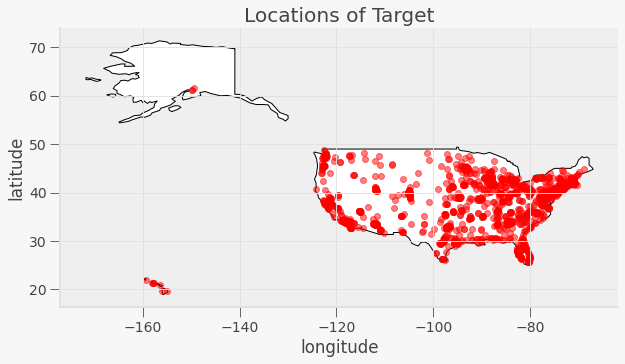

In [15]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Locations of Target')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

To find the optimal number of DCs, we import the KMeans module within Scikit-learn, along with the elbow method viewer to find the optimal K or number of DCs

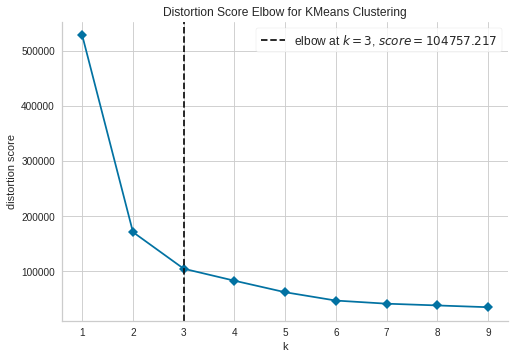

In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


model = KMeans(init="random",max_iter=500,random_state=7)
plot = KElbowVisualizer(model, k=(1,10),timings=False) 

plot.fit(latlong) 
plot.show()       

Once this is done, we proceed to use the optimal number in K for our model

In [17]:
best_center=KMeans(n_clusters=3,init="random",max_iter=500,random_state=7)
best_center.fit(latlong)

KMeans(init='random', max_iter=500, n_clusters=3, random_state=7)

On the variable centers, the K-Means cluster will be saved

In [18]:
centers=best_center.cluster_centers_

Let's see the coordinates

In [19]:
print(centers)

[[  37.48734203 -118.62447332]
 [  37.789554    -78.56990807]
 [  37.98006261  -93.3271723 ]]


Now the results will be saved in a new dataframe

In [20]:
locations=pd.DataFrame(centers, columns = ["Latitude","Longitude"])
locations["Coordinates"] = list(zip(locations.Longitude, locations.Latitude))
locations["Coordinates"] = locations["Coordinates"].apply(Point)

The labels are saved inside the labels variable, to later save them inside a dataframe called **assigned_distribution_center**.

In [21]:
labels=best_center.labels_
assigned_distribution_center=pd.DataFrame(labels,columns=["Distribution center"])

Now it's time to concatenate the latlong and assigned_distribution_center dataframes in order to know the distribution center that serves each store.

In [22]:
df=pd.concat([df,assigned_distribution_center],axis=1) 

Let's visualize the result

In [23]:
df.head()

,name,latitude,longitude,address,phone,website,Coordinates,Distribution center
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),2
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),2
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),2
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),2
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606),1


Now it's time to plot the stores, and the location of the distribution centers (black dots)

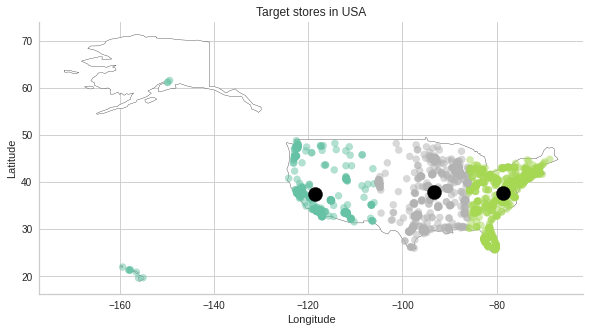

In [24]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf2=gpd.GeoDataFrame(locations,geometry="Coordinates")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

fig, gax = plt.subplots(figsize=(10,5))

# By only plotting rows in which the continent is 'Mexico' we only plot, well,
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, alpha = 0.5,column="Distribution center",cmap="Set2")
gdf2.plot(ax=gax,c="black",markersize=200)
gax.set_xlabel('Longitude')
gax.set_ylabel('Latitude')
gax.set_title('Target stores in USA')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Let's see how many stores will be managed by each distribution center


In [25]:
n_stores=np.bincount(labels)

n_stores will be saved in a dataframe

In [26]:
n_stores_df=pd.DataFrame(n_stores,columns=["Number of stores per Distribution Center"])

Now we see the number of stores per distribution center

In [27]:
n_stores_df

,Number of stores per Distribution Center
0,385
1,826
2,628


On the locations dataframe the number of stores per distribution center will be saved


In [28]:
locations=pd.concat([locations,n_stores_df],axis=1)

Print the result

In [29]:
locations

,Latitude,Longitude,Coordinates,Number of stores per Distribution Center
0,37.487342,-118.624473,POINT (-118.62447 37.48734),385
1,37.789554,-78.569908,POINT (-78.56991 37.78955),826
2,37.980063,-93.327172,POINT (-93.32717 37.98006),628


Now let's find the latitudes and longitudes of the stores

Using a function to know the location of each distribution center

In [30]:
from geopy.geocoders import Nominatim
from geopy.point import Point

geolocator = Nominatim(user_agent="test")

def reverse_geocoding(lat, lon):
        location = geolocator.reverse(Point(lat, lon))
        return location.raw['display_name']

locations['address'] = np.vectorize(reverse_geocoding)(locations["Latitude"], locations["Longitude"])

locations.head()

,Latitude,Longitude,Coordinates,Number of stores per Distribution Center,address
0,37.487342,-118.624473,POINT (-118.62447 37.48734),385,"Paradise Estates, Mono County, California, Uni..."
1,37.789554,-78.569908,POINT (-78.56991 37.78955),826,"Langhorne Road, Totier Hills, Albemarle County..."
2,37.980063,-93.327172,POINT (-93.32717 37.98006),628,"Hickory County, Missouri, United States"


As can be seen the first location will be geographically located at position (37.487342 ,-118.624473), it will deliver products to 385 stores and will be positioned near Paradise Estates, Mono County, California, the second location will be by the coordinates (37. 789554, -78.569908), it will be the distribution center for 826 stores and the point of interest will be located near Langhorne Road, Totier Hills, Albemarle County, Virginia, the last warehouse will be by coordinates (37.980063, -93.327172), it will serve 628 stores and will be at a location near Hickory County, Missouri. 		

Now that we have the coordinates, it's time to know the distance between the store and the distribution center, for that a function to measure the haversine distance will be needed

In [31]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)


Followed by another function that separates the dataset according to the distribution center and calculates the distance in km using the **harvesine_distance** function previously created.

In [32]:

def measure_distance(warehouse,start_lat,start_lon): #le pasamos el 
  subset=df[df["Distribution center"]==warehouse] #filtramos el almácen que nos interesa
  distances_km = [] #creamos una lista donde llenamos los valores
  for row in subset.itertuples(index=False):
    distances_km.append(
        haversine_distance(start_lat, start_lon, row.latitude, row.longitude) #calculamos la distancia
    )
  subset["distance"]=distances_km #creamos una nueva columna con las distancias obtenidas en el ciclo for
  return subset


Let's store the result in a variable, then visualize the result.

In [33]:
warehouse1=measure_distance(0,37.487342,-118.624473)
warehouse1.head()

,name,latitude,longitude,address,phone,website,Coordinates,Distribution center,distance
22,Wasilla,61.577919,-149.402960,"1801 E Parks Hwy, Wasilla, AK 99654-7350",907-631-7200,https://www.target.com/sl/wasilla/2339,POINT (-149.40296 61.57792),0,3415.49
23,Anchorage NE,61.229952,-149.745967,"1200 N Muldoon Rd, Anchorage, AK 99504-6103",907-269-2100,https://www.target.com/sl/anchorage/2371,POINT (-149.74597 61.22995),0,3406.87
24,Anchorage South,61.130062,-149.881451,"150 W 100th Ave, Anchorage, AK 99515-2673",907-267-7500,https://www.target.com/sl/anchorage/2372,POINT (-149.88145 61.13006),0,3406.16
25,Bullhead City,35.052824,-114.591900,"3699 Hwy 95, Bullhead City, AZ 86442-9119",928-704-5064,https://www.target.com/sl/bullhead-city/2368,POINT (-114.59190 35.05282),0,451.56
26,Flagstaff,35.184058,-111.659179,"1650 S Milton Rd, Flagstaff, AZ 86001-0802",928-774-3500,https://www.target.com/sl/flagstaff/935,POINT (-111.65918 35.18406),0,674.20


Get the mean of the first warehouse

In [34]:
warehouse1.distance.mean()

695.3764155844157

The average distance between a branch and distribution center 1 is approximately **700 km**. We do the same for warehouses 2 and 3.

In [35]:
warehouse2=measure_distance(1,37.789554,-78.569908)
warehouse2.head()

,name,latitude,longitude,address,phone,website,Coordinates,Distribution center,distance
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606),1,960.11
11,Opelika,32.620432,-85.405043,"2640 Enterprise Dr, Opelika, AL 36801-1511",334-705-0152,https://www.target.com/sl/opelika/1499,POINT (-85.40504 32.62043),1,845.71
12,Oxford,33.609201,-85.784654,"400 Oxford Exchange Blvd, Oxford, AL 36203-3459",256-231-2900,https://www.target.com/sl/oxford/2153,POINT (-85.78465 33.60920),1,799.90
325,Ansonia,41.340748,-73.079818,"20 W Main St, Ansonia, CT 06401-1812",203-278-5055,https://www.target.com/sl/ansonia/2249,POINT (-73.07982 41.34075),1,614.10
326,Bethel,41.414463,-73.401998,"7 Stony Hill Rd, Bethel, CT 06801-1030",203-448-1029,https://www.target.com/sl/bethel/1528,POINT (-73.40200 41.41446),1,598.54


In [36]:
warehouse2.distance.mean()

586.9095641646489

On average, each branch will be located 590 km from distribution center number 2.

In [37]:
warehouse3=measure_distance(2,37.980063,-93.327172)
warehouse3.head()

,name,latitude,longitude,address,phone,website,Coordinates,Distribution center,distance
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),2,791.72
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),2,770.78
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),2,959.67
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),2,684.75
5,Florence,34.842085,-87.633908,"372 Cox Creek Pkwy, Florence, AL 35630-1540",256-764-6924,https://www.target.com/sl/florence/1322,POINT (-87.63391 34.84209),2,617.31


In [38]:
warehouse3.distance.mean()

696.3408598726114

On average, each branch is 700 km away from the distribution center 3


# Conclusions
From the elbow method it was obtained that the number of clusters (warehouses) needed is 3, which will be located in 3 states: California, Virginia and Missouri, the coordinates obtained will not necessarily be the most appropriate to build the warehouses, these buildings can be in a geographical position, close to the reference point obtained with K-means, the 3 points obtained will serve as a reference to build the buildings, the warehouse in California will provide products to 385 branches, while the one in Virginia will serve 826 and finally Missouri will serve 628 branches. On average, the distance the trucks will travel between the warehouse and the branch will be in the range of 600 to 700 km.